# Problem 1 BABY NAMES BY STATE and YEAR

## BabyName Class

In [1]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from functools import reduce

class BabyNames():
    def __init__(self, filepaths, columns):
        self.filepaths = filepaths
        self.columns = columns
        self.df = self.Constructor()
        

    # Load data
    def Constructor(self):
        # Create an empty dataframe
        self.df = pd.DataFrame()
        
        # Append all files into a single dataframe
        for i in self.filepaths:
            frame = pd.read_csv(i, names=self.columns)
            self.df = self.df.append(frame)
        return self.df
    
    # Count totao births based on different states and years
    def CountBirths(self, state=None, year=None): 
        if year == None and state != None:
            return self.df[self.df.State == state]['Number'].sum()
        
        if state == None and year != None:
            return self.df[self.df.Year == year]['Number'].sum()
        
        if state == None and year == None:
            return self.df['Number'].sum()
        
        else:
            return self.df[(self.df.State == state) & (self.df.Year == year)]['Number'].sum()
           

    def Top10BabyNames(self, state=None, year=None):
        # If year/state is missing, group by year/state
        # df1 for top 10 male names, df2 for female names    
        if year == None and state != None:
            df1 = pd.DataFrame(self.df[(self.df.State == state) & (self.df.Gender == 'M')].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
            df2 = pd.DataFrame(self.df[(self.df.State == state) & (self.df.Gender == 'F')].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
        
        elif state == None and year != None:
            df1 = pd.DataFrame(self.df[(self.df.Year == year) & (self.df.Gender == 'M')].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
            df2 = pd.DataFrame(self.df[(self.df.Year == year) & (self.df.Gender == 'F')].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
        
        elif state == None and year == None:
            df1 = pd.DataFrame(self.df[self.df.Gender == 'M'].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
            df2 = pd.DataFrame(self.df[self.df.Gender == 'F'].groupby('Name')['Number'].sum().sort_values(ascending=False)).reset_index()['Name'][:10]
        
        else:
            df1 = self.df[(self.df.State == state) & (self.df.Year == year) & (self.df.Gender == 'M')].sort_values(by=['Number'],ascending=False)[:10]['Name']
            df2 = self.df[(self.df.State == state) & (self.df.Year == year) & (self.df.Gender == 'F')].sort_values(by=['Number'],ascending=False)[:10]['Name']
        
        # Ranking number from 1 to 1o
        rank = [i+1 for i in range(10)]
        
        # Dictionary stores three columns: rank, Male, Female
        ranking = {'Rank': rank,
           'Male': df1.values.tolist(),
           'Female': df2.values.tolist()}
        
        return pd.DataFrame(ranking)
    
    # Function to compare number of a name in differnet years
    def change(self, df):
        if df['diff'] == 0:
            val = 'same'
        elif df['diff'] > 0:
            val = 'increase'
        else:
            val = 'decrease'
        return val
    
    # Lists of baby names that showed change in popularity(increase/decrease/same)
    def ChangeOfPopularity(self, fromYear=2014, toYear=2015, top=10):
        df_prev = pd.DataFrame(self.df[(self.df.Year == fromYear)].groupby('Name')['Number'].sum()).reset_index()
        df_next = pd.DataFrame(self.df[(self.df.Year == toYear)].groupby('Name')['Number'].sum()).reset_index()
        df_merge = df_prev.merge(df_next, on='Name', how='outer')
        df_merge.fillna(0)
        df_merge['diff'] = (df_merge['Number_y'] - df_merge['Number_x'])/df_merge['Number_x']
        df_merge= df_merge.sort_values(by=['diff'], ascending=False)
        df_merge['Change'] = df_merge.apply(self.change, axis=1)
        df_merge = pd.concat([df_merge[df_merge.Change == 'increase'].head(top), 
                          df_merge[df_merge.Change == 'decrease'].head(top), 
                          df_merge[df_merge.Change == 'same'].head(top)])[['Name','Change']].reset_index(drop=True)
        
        return df_merge

        
    
    def Top5NamesPerYear(self, year=2015, sex=None):
        # Group by state, select top 5 (by number of births) popular names
        if sex != None and year != None:
            df_M = self.df[(self.df.Year == year) & (self.df.Gender == sex)][['State', 'Name', 'Number']].groupby('State').apply(lambda x: x.sort_values(by='Number', ascending=False)[:5]).reset_index(drop= True)
        
        elif sex == None and year != None:
             df_M = self.df[self.df.Year == year][['State', 'Name', 'Number']].groupby('State').apply(lambda x: x.sort_values(by='Number', ascending=False)[:5]).reset_index(drop= True)
                
        elif sex != None and year == None:
             df_M = self.df[self.df.Gender == sex][['State', 'Name', 'Number']].groupby('State').apply(lambda x: x.sort_values(by='Number', ascending=False)[:5]).reset_index(drop= True)
        
        else:
             df_M = self.df[['State', 'Name', 'Number']].groupby('State').apply(lambda x: x.sort_values(by='Number', ascending=False)[:5]).reset_index(drop= True)
       
    # Create a new df with only unique state name
        df_New = pd.DataFrame(df_M['State'].unique())
        df_New.columns = ['State']
        
        # Selcet rank1 to rank5 name along with the number of births for the name, add to the new df
        df_New['Rank1'] = df_M.assign(Rank1=lambda df_M: df_M.groupby('State').nth(0).reset_index()['Name'])['Rank1']
        df_New['Num1'] = df_M.assign(Num1=lambda df_M: df_M.groupby('State').nth(0).reset_index()['Number'])['Num1']
        
        df_New['Rank2'] = df_M.assign(Rank2=lambda df_M: df_M.groupby('State').nth(1).reset_index()['Name'])['Rank2']
        df_New['Num2'] = df_M.assign(Num2=lambda df_M: df_M.groupby('State').nth(1).reset_index()['Number'])['Num2']
        
        df_New['Rank3'] = df_M.assign(Rank3=lambda df_M: df_M.groupby('State').nth(2).reset_index()['Name'])['Rank3']
        df_New['Num3'] = df_M.assign(Num3=lambda df_M: df_M.groupby('State').nth(2).reset_index()['Number'])['Num3']
        
        df_New['Rank4'] = df_M.assign(Rank4=lambda df_M: df_M.groupby('State').nth(3).reset_index()['Name'])['Rank4']
        df_New['Num4'] = df_M.assign(Num4=lambda df_M: df_M.groupby('State').nth(3).reset_index()['Number'])['Num4']
        
        df_New['Rank5'] = df_M.assign(Rank5=lambda df_M: df_M.groupby('State').nth(4).reset_index()['Name'])['Rank5']
        df_New['Num5'] = df_M.assign(Num5=lambda df_M: df_M.groupby('State').nth(4).reset_index()['Number'])['Num5']
        
        cols = ["State", 'Rank1','Num','Rank2','Num','Rank3','Num','Rank4','Num','Rank5','Num' ]
        df_New.columns = cols

         
        # Change the abbreviation to full name
        state_name = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming' }
        
        return df_New.replace({'State':state_name})
    
    def NamePopularityPlot(self, name='Jim', yearRange=(2000,2015), state='IL', sex='M'):
        # add the start year and end year to a list 
        yr_list = list(yearRange)
        percent = []
        
        for year in range(yr_list[0], yr_list[1]+1):
            # Get the total births of a gender 
            df_year = self.df[(self.df.State == state)&(self.df.Gender == sex)&(self.df.Year == year)]
            sum_year = df_year['Number'].sum()  
            
            # Check the name we want is in the name of that year in a state
            # Sometimes nobody in a state is named after a name we request
            check_exist = df_year[df_year.Name == name].count()['Name']
            
            # Sum the total number for a name if the name was used in that year
            if check_exist == 0:
                num_year = 0
            else:
                num_year = df_year[df_year.Name == name].iloc[-1]['Number']
            
            # Append each year's percent of a name in percet_year[]
            percent_year = round(num_year/sum_year*100, 4)
            percent.append(percent_year)

        # x-axis labels
        x=[]
        i = yr_list[0]

        while i <= yr_list[1]:
            x.append(i)
            i += 1

        # Create plot
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(x, percent, label= name)

        # Set plot layout
        plt.xlabel('Year', fontsize=18)
        plt.ylabel('Popularity(%)', fontsize=18)
        plt.title('Name popularity changes over the year', fontsize=20)
        ax.legend()
        plt.show()
        
    # Compare the numbers of a name used for both genders then identify dominance
    def dom(self, df):
        if df['Number_x'] >= df['Number_y']:
            val = 1
        else:
            val = 0

        return val
    
    # Function that indentifies dominance of each name in a specific year
    def merge_year_dom(self, yr): 
        # Select unique names for both male and female in a specific year
        df_M = pd.DataFrame(self.df[(self.df.Gender == 'M') & (self.df.Year == yr)]['Name'].unique())
        df_M.columns = ['Name']

        df_F = pd.DataFrame(self.df[(self.df.Gender == 'F') & (self.df.Year == yr)]['Name'].unique())
        df_F.columns = ['Name']
        
        # Identify names that not used by both genders
        df_only_M = df_M[~df_M['Name'].isin(df_F['Name'])].reset_index(drop=True)
        df_only_F = df_F[~df_F['Name'].isin(df_M['Name'])].reset_index(drop=True)
        
        # '1' for male-only names 'o' for female-only names
        df_only_M[str(yr)] = 1
        df_only_F[str(yr)] = 0
       
        # Merge male-only and female-only 
        df_merge_only = df_only_M.append(df_only_F)
        
        # Group by name, count numbers for name with both labels 'M' or 'F', and merge into a single df
        df_M_count = pd.DataFrame(self.df[(self.df.Gender == 'M') & (self.df.Year == yr)].groupby('Name').count()['Number']).reset_index()
        df_F_count = pd.DataFrame(self.df[(self.df.Gender == 'F') & (self.df.Year == yr)].groupby('Name').count()['Number']).reset_index()
        df_merge = df_M_count.merge(df_F_count, on='Name', how='inner')
  

        # '1' for male-dominated, 'o' for female_dominated
        df_merge[str(yr)] = df_merge.apply(self.dom, axis=1)
        df_result = df_merge.drop(columns=['Number_x','Number_y'])

        return df_merge_only.append(df_result) 
    
    # Function that count number of flip
    def flip(self, df):
        year = 1910
        count = 0
        while year < 2017:
            if df[str(year)] != df[str(year+1)]:
                count += 1
                year += 1
            else:
                year += 1
        return count


    def NameFlip(self, n=10):   
        #"A name flips when it goes from being male-dominated to 
        #female- dominated in successive years or vice-versa. 
        #The criteria for being a "top" name flipper is how many times the name flipped.
        df_list = []
        year = 1910
        
        # Append df of different year's name dominance into df_list[]
        while year <= 2017:
            df_list.append(self.merge_year_dom(year))
            year += 1
        
        # Merge df of each year one by one
        result = reduce(lambda x, y: pd.merge(x, y, on = 'Name'), df_list)
        result['Flip'] = result.apply(self.flip, axis=1)
        
        # Sort df by number of flip
        df_flip = result.sort_values(by=['Flip'], ascending=False)[['Name', 'Flip']].head(n)

        # Create plot
        fig, ax = plt.subplots(figsize=(20,20))
        y_pos = range(len(df_flip['Name']))

        # Set format
        ax.barh(y_pos, df_flip['Flip'], align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_flip['Name'], fontsize=25)
        title = 'Top ' + str(n) +' flipped names, 1910-2017'
        ax.set_xlabel('Flip Times', fontsize=25)
        plt.xticks(fontsize=25)
        ax.set_title(title, fontsize=30)
        plt.show()

## Code demonstration

### Please edit the filepath before running the code

In [2]:
# Load all txt files's filenames into a 'filepaths' list
filepaths = [f for f in listdir("../namesbystate") if f.endswith('.TXT')]
columns = ['State', 'Gender','Year','Name', 'Number']

baby = BabyNames(filepaths, columns)   # call Constructor() when initialize the class

In [3]:
df = baby.Constructor()
df.tail()

,State,Gender,Year,Name,Number
31833,DE,M,2017,Seth,5
31834,DE,M,2017,Travis,5
31835,DE,M,2017,Trevor,5
31836,DE,M,2017,Tyson,5
31837,DE,M,2017,Zayne,5


In [4]:
baby.CountBirths(state='WI',year=2015)

50235

In [5]:
baby.Top10BabyNames()

,Rank,Male,Female
0,1,James,Mary
1,2,John,Patricia
2,3,Robert,Elizabeth
3,4,Michael,Jennifer
4,5,William,Linda
5,6,David,Barbara
6,7,Richard,Margaret
7,8,Joseph,Susan
8,9,Charles,Dorothy
9,10,Thomas,Jessica


In [6]:
baby.ChangeOfPopularity (fromYear=2014, toYear=2015, top=10)

,Name,Change
0,Kaiser,increase
1,Bexley,increase
2,Alaia,increase
3,Riaan,increase
4,Adaline,increase
5,Meilani,increase
6,Royalty,increase
7,Aitana,increase
8,Octavia,increase
9,Charleston,increase


In [7]:
baby.Top5NamesPerYear(year=2000, sex='M')

,State,Rank1,Num,Rank2,Num,Rank3,Num,Rank4,Num,Rank5,Num
0,Alaska,Michael,74.0,Jacob,68.0,William,65.0,Joshua,58.0,James,57.0
1,Alabama,William,655.0,Jacob,613.0,Joshua,503.0,Michael,452.0,Christopher,452.0
2,Arkansas,Jacob,378.0,William,266.0,Michael,249.0,Joshua,239.0,Christopher,228.0
3,Arizona,Jacob,682.0,Michael,621.0,Daniel,570.0,Jose,542.0,Anthony,495.0
4,California,Daniel,4339.0,Anthony,3838.0,Jose,3803.0,Andrew,3600.0,Michael,3571.0
5,Colorado,Jacob,519.0,Michael,443.0,Joshua,425.0,Matthew,372.0,Ryan,369.0
6,Connecticut,Michael,553.0,Matthew,461.0,Nicholas,440.0,Christopher,384.0,Ryan,369.0
7,District of Columbia,John,113.0,Christopher,106.0,William,105.0,Michael,104.0,Anthony,88.0
8,Delaware,Michael,139.0,Matthew,105.0,Jacob,99.0,Joshua,95.0,Nicholas,94.0
9,Florida,Michael,1829.0,Joshua,1591.0,Christopher,1462.0,Matthew,1354.0,Jacob,1338.0


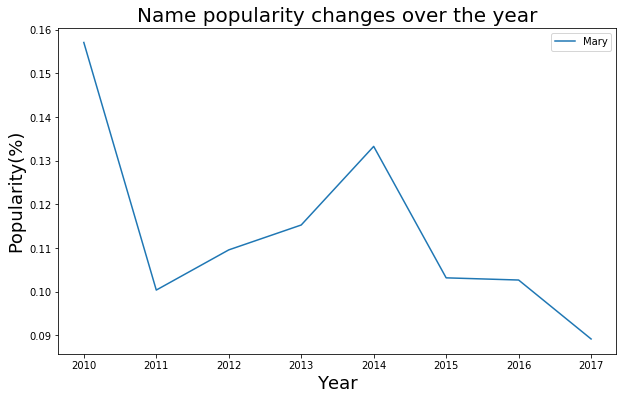

In [8]:
baby.NamePopularityPlot(name='Mary', yearRange=(2010,2017), state='NY', sex='F')

In [ ]:
baby.NameFlip(n=10)

## Story

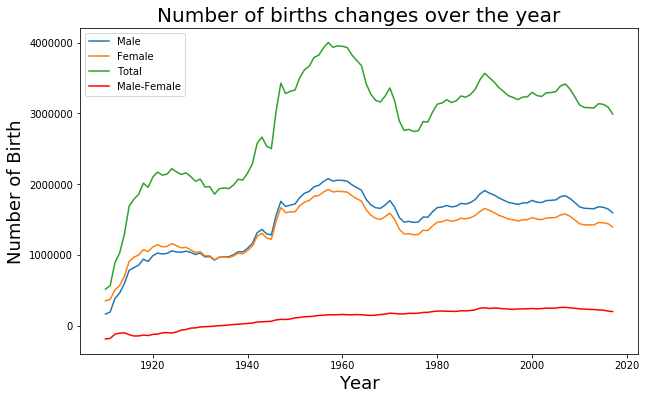

In [10]:
# Story

df = baby.Constructor()
df1 = pd.DataFrame(df[df.Gender == 'M'].groupby('Year')['Number'].sum()).reset_index()
df2 = pd.DataFrame(df[df.Gender == 'F'].groupby('Year')['Number'].sum()).reset_index()
df3 = df1.merge(df2, on='Year').rename(columns={'Number_x': 'Male','Number_y':'Female'})
df3['Diff'] = df3['Male'] - df3['Female']
df3['Total'] = df3['Male'] + df3['Female']

 # Create plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df3['Year'], df3['Male'], label= 'Male')
ax.plot(df3['Year'], df3['Female'], label= 'Female')
ax.plot(df3['Year'], df3['Total'], label= 'Total')
ax.plot(df3['Year'], df3['Diff'], color = 'Red', label= 'Male-Female')

# Set plot layout
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Birth', fontsize=18)
plt.title('Number of births changes over the year', fontsize=20)
ax.legend()
plt.show()

Before the 1940s, there are more girls born compared to the number of boys. However, after 1940, the number has changed. More boys are born. The difference in birth continues to increase from 1940s to about 2010s. 

# Exercise 2 Pandas

In [11]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

In [12]:
cnx = pymysql.connect(user='root', \
      password='C400000a', \
      host= '127.0.0.1', \
      port=3306, \
      db='world', \
      autocommit=True)

In [13]:
df_country = pd.read_sql_query('select * from Country', con=cnx,index_col='Code')
df_city = pd.read_sql_query('select * from city', con=cnx,index_col='ID')
df_countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx,index_col=['CountryCode','Language'])

### The pandas code in this section are all written in one line. Thus, some lines may be very long.

### part 1

select *<br>
from country<br>
where population > 50000000<br>
order by population DESC limit 10;<br>

Description:</br>
This SQL statement finds the countries with population greater than 50000000, sort them in descending order, and selects the top 10 countries. In other words, the ten countries with most populations (has to be > 50000000).

In [14]:
df_country.loc[df_country['Population'] > 50000000].sort_values('Population', ascending = False).reset_index().head(10)



,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
1,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
2,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US
3,IDN,Indonesia,Asia,Southeast Asia,1904569.0,1945.0,212107000,68.0,84982.0,215002.0,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
4,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
5,PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947.0,156483000,61.1,61289.0,58549.0,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
6,RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
7,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
8,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
9,NGA,Nigeria,Africa,Western Africa,923768.0,1960.0,111506000,51.6,65707.0,58623.0,Nigeria,Federal Republic,Olusegun Obasanjo,2754.0,NG


### Part 2

select Continent, count(*) As Number_Countries, sum(population) As Population from country<br>
where population > 0<br>
group by Continent<br>
order by 1 ASC;

Description: The SQL statement calcuates the number of countries and population on each continent, and order by continent.

In [15]:
pd.concat([df_country[df_country['Population'] > 0].iloc[:,[1,2]].groupby(by='Continent').count(), 
           df_country[df_country['Population'] > 0][['Continent', 'Population']].groupby(by='Continent').sum()], axis = 1).rename(columns={'Region':'Number_Countries'}, inplace=False).reset_index()



,Continent,Number_Countries,Population
0,Africa,57,784475000
1,Asia,51,3705025700
2,Europe,46,730074600
3,North America,37,482993000
4,Oceania,27,30401150
5,South America,14,345780000


### Part 3

select city.Name As City, city.population<br>
from city<br>
inner join country ON city.CountryCode = country.code<br>
where country.code = 'USA'<br>
order by city.population DESC limit 10

Description: The SQL statement select the top 10 cities in the USA with the most population.

In [16]:
df_city[df_city['CountryCode'] == 'USA'].merge(df_country.reset_index(), how = 'inner', right_on='Code', left_on='CountryCode').rename(columns={'Name_x':'City','Population_x':'population'})[['City','population']].groupby(by='City').sum().sort_values('population', ascending = False).reset_index().head(10)



,City,population
0,New York,8008278
1,Los Angeles,3694820
2,Chicago,2896016
3,Houston,1953631
4,Philadelphia,1517550
5,Phoenix,1321045
6,San Diego,1223400
7,Dallas,1188580
8,San Antonio,1144646
9,Detroit,951270


### Part 4

select country.Name, Language, (Percentage * population) / 100 <br>
from countrylanguage <br>
inner join country on countrylanguage.CountryCode = country.code <br>
where IsOfficial = True<br>
order by 3 DESC limit 10

Description: The SQL statement select the top 10 most people used official languages, the countries in where they are official, and order by the amount of people who speak the languages.

In [17]:
df_countrylanguage[df_countrylanguage['IsOfficial'] == 'T'].reset_index().merge(df_country.reset_index(),how = 'inner', right_on='Code', left_on='CountryCode').assign(Pop = lambda df: df.Percentage * df.Population/100)[['Name','Language','Pop']].sort_values('Pop', ascending=False).rename(columns={'Pop':'( Percentage * population ) / 100'}).head(10).reset_index(drop=True).reset_index()



,index,Name,Language,( Percentage * population ) / 100
0,0,China,Chinese,1.175353e+09
1,1,India,Hindi,4.044511e+08
2,2,United States,English,2.399437e+08
3,3,Brazil,Portuguese,1.658621e+08
4,4,Russian Federation,Russian,1.272448e+08
5,5,Bangladesh,Bengali,1.261844e+08
6,6,Japan,Japanese,1.255736e+08
7,7,Mexico,Spanish,9.106940e+07
8,8,Germany,German,7.501637e+07
9,9,Vietnam,Vietnamese,6.929418e+07


### Part 5

select Language, sum((Percentage * population) / 100)<br>
from countrylanguage<br>
inner join country ON countrylanguage.CountryCode = country.code<br>
group by Language<br>
order by 2 desc limit 5

Description: This SQL statement finds the top 5 most spoken languages and the amount of population that speaks it.

In [18]:
df_countrylanguage[['Percentage']].reset_index().merge(df_country[['Population']].reset_index(), how = 'inner', left_on='CountryCode', right_on='Code').assign(ttl = lambda df: df.Percentage*df.Population/100).groupby(by='Language')[['ttl']].sum().sort_values('ttl', ascending=False).rename(columns={'ttl':'sum((Percentage * population) / 100)'}).reset_index().head(5)



,Language,sum((Percentage * population) / 100)
0,Chinese,1.191844e+09
1,Hindi,4.056331e+08
2,Spanish,3.550295e+08
3,English,3.470779e+08
4,Arabic,2.338392e+08
